In [3]:
import sys
sys.path.append("../..")
import os
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import linear_model
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import r2_score
# import statsmodels.api as sm
from scipy.stats import boxcox, pearsonr
# import statsmodels.formula.api as smf
import statsmodels.stats.multitest as multi
from joblib import Parallel, delayed, parallel_backend
# from statsmodels.sandbox.tools import cross_val
import gc
import scipy.io as sio
from sklearn.linear_model import LassoLars

# from modeldb.sklearn_native import CrossValidationScore
from sklearn.model_selection import GridSearchCV
import traceback
import math

from sklearn.model_selection import cross_val_score
from coh_tools import *
from get_data import get_dataframes

%matplotlib inline

# style.use("seaborn-colorblind")
style.use("tableau-colorblind10")

In [4]:
only_paired = False

# dataframes = get_dataframes("/home/julien/school/lab/opto_data_analysis", 
#                      "/mnt/hdd2tb/lab/elife/data", only_paired=only_paired,
#                      skip_short=True, scale_PCA=False)

# dataframes = pkl.load(open("/mnt/m1tb/processed/processed_optodata_3mar20.pkl", "rb"))
dataframes = pkl.load(open("../../../../Desktop/GDrive/opto_data/processed_optodata_3mar20.pkl", "rb"))

# dataframes = get_dataframes("C:/Users/julienb/lab/opto_data_analysis", "C:/Users/julienb/lab/data", only_paired=only_paired,
#                             skip_short=True, scale_PCA=True)

In [8]:
dataframes["theta"][dataframes["theta"][Is_stim_site_2] == dataframes["theta"][]]

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
       'Distance_to_A1', 'Distance_to_B1', 'Distance_to_A2', 'Distance_to_B2',
       'PC1a_mean', 'PC2a_mean', 'PC1b_mean', 'PC2b_mean', 'PC1a_sd',
       'PC2a_sd', 'PC1b_sd', 'PC2b_sd', 'Initial_coh_sd', 'Cond_coh_sd',
       'Coh_diff_sd', 'Coh_sum_sd', 'Coh_diff_mag', 'Coh_sum_mag',
       'On_diagonal', 'In_upper_triangle', 'Num_lasers', 'Delays', 'Monkeys',
       'Block_num', 'Experiment_block_key', 'Both_M1', 'Both_S1',
       'cond_diff_Y', 'cond_diff_percent_Y', 'diff_Y', 'diff_percent_Y',
       'Is_stim_site_1', 'Is_stim_site_2'],
      dtype='object')

In [6]:
dataframes["theta"]["Delays"].unique()

array([ 30.,  10., 100.])

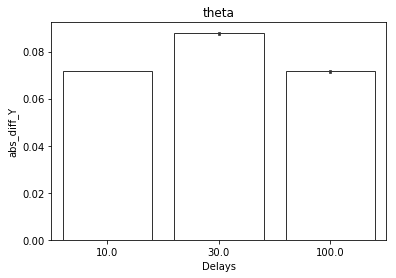

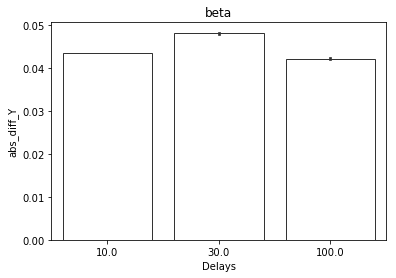

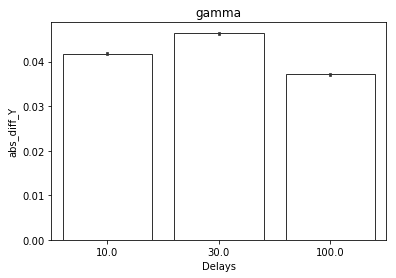

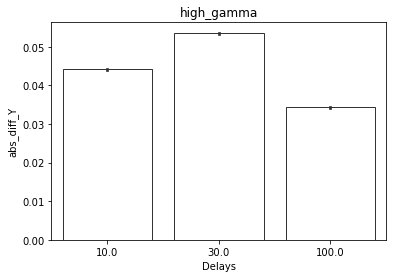

In [14]:
for band in dataframes.keys():
    dataframes[band]["abs_diff_Y"] = np.abs(dataframes[band]["diff_Y"])
    sns.barplot(x="Delays", y="abs_diff_Y", data=dataframes[band][dataframes[band]["On_diagonal"] == 0],
            ci=68, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
    plt.title(band)
    plt.show()